What are the most demanded skills for the top 3 most popular data roles?

Methodology

1.Clean-up skill column
2. Calculate skill count bsaed on 'job_title_short' column
3. Calculate skill percentage
4. Plot final findings

In [ ]:
#Installing libraries

import pandas as pd
!pip install datasets
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast
import seaborn as sns

#Loading data

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data cleanup

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: C:\Users\zyesn\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable


In [47]:
#create a new dataframe containing only US data

df_us = df[df['job_country'] == 'United States']

In [48]:
#apply explode method for US dataset above to convert job skills list to single items
#drop n/a value from exploded 'job_skills' column

df_skills = df_us.explode('job_skills')
df_skills = df_skills.dropna(subset='job_skills')

In [49]:
#group by df_skills by job_skills and job_title short to prepare a dataframe
df_skills_count = df_skills.groupby(['job_skills','job_title_short']).size()

In [50]:
#reset index to create a dataframe
df_skills_count = df_skills_count.reset_index(name='skill_count')

In [51]:
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)

In [ ]:
df_skills_count

,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
1785,vue.js,Business Analyst,1
60,arch,Business Analyst,1
71,asana,Machine Learning Engineer,1
968,no-sql,Machine Learning Engineer,1


In [121]:
#Convert top 3 job titles to list from 'job_title_short' column
job_titles = df_skills_count['job_title_short'].unique().tolist()
job_titles = sorted(job_titles[:3])

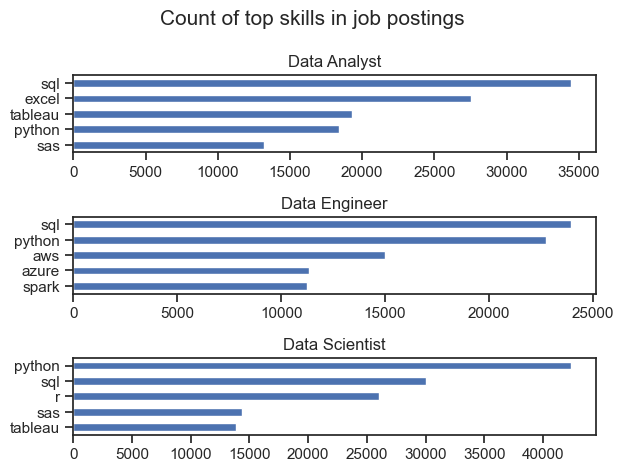

In [122]:
#Plot a result
fig, ax = plt.subplots(len(job_titles),1)

for i,job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind = 'barh', x = 'job_skills', y = 'skill_count', ax = ax[i], title = job_title)
    plt.tight_layout()
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)

fig.suptitle('Count of top skills in job postings', fontsize = 15)
fig.tight_layout(h_pad=1)
plt.show()

In [123]:
df_job_title_count = df_us['job_title_short'].value_counts().reset_index(name = 'jobs_total')

In [120]:
df_skills_perc = pd.merge(df_skills_count, df_job_title_count, how = 'left', on = 'job_title_short')
df_skills_perc['skill_percent'] = 100 * df_skills_perc['skill_count'] / df_skills_perc['jobs_total'] 
df_skills_perc

,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1865,vue.js,Business Analyst,1,7382,0.013546
1866,arch,Business Analyst,1,7382,0.013546
1867,asana,Machine Learning Engineer,1,921,0.108578
1868,no-sql,Machine Learning Engineer,1,921,0.108578


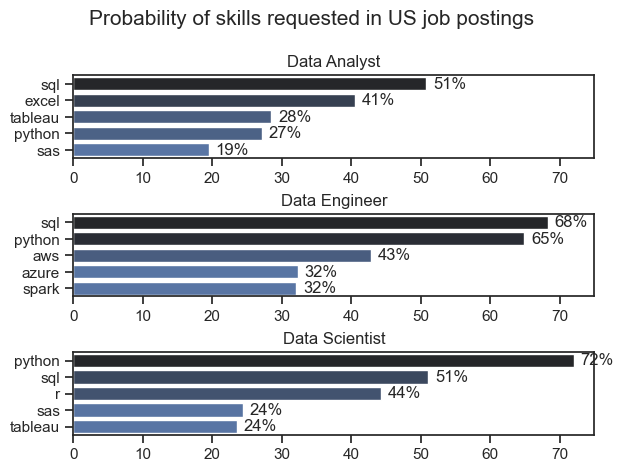

In [131]:
#Plot a result
fig, ax = plt.subplots(len(job_titles),1)
sns.set_theme(style = 'ticks')



for i,job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)
    sns.barplot(data = df_plot, x = 'skill_percent', y = 'job_skills', ax = ax[i], hue = 'skill_count', palette = 'dark:b_r' )
    plt.tight_layout()
    ax[i].set_title(job_title)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0,75)

    for n, v in enumerate(df_plot['skill_percent']):
        ax[i].text(v+1, n, f'{v:.0f}%', va='center')


fig.suptitle('Probability of skills requested in US job postings', fontsize = 15)
fig.tight_layout(h_pad=0.5)
plt.show()